In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
idx_3 = np.where(df.quality == 3)
idx_4 = np.where(df.quality == 4)
idx_5 = np.where(df.quality == 5)
idx_6 = np.where(df.quality == 6)
idx_7 = np.where(df.quality == 7)
idx_8 = np.where(df.quality == 8)

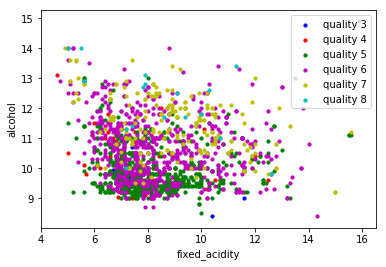

In [8]:
plt.scatter(df.iloc[idx_3].fixed_acidity, df.iloc[idx_3].alcohol, s=10, c='b', marker="o", label='quality 3')
plt.scatter(df.iloc[idx_4].fixed_acidity, df.iloc[idx_4].alcohol, s=10, c='r', marker="o", label='quality 4')
plt.scatter(df.iloc[idx_5].fixed_acidity, df.iloc[idx_5].alcohol, s=10, c='g', marker="o", label='quality 5')
plt.scatter(df.iloc[idx_6].fixed_acidity, df.iloc[idx_6].alcohol, s=10, c='m', marker="o", label='quality 6')
plt.scatter(df.iloc[idx_7].fixed_acidity, df.iloc[idx_7].alcohol, s=10, c='y', marker="o", label='quality 7')
plt.scatter(df.iloc[idx_8].fixed_acidity, df.iloc[idx_8].alcohol, s=10, c='c', marker="o", label='quality 8')
plt.ylabel('alcohol')
plt.xlabel('fixed_acidity')
plt.legend()
plt.show()

In [10]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [16]:
feature_df=df.iloc[:,0:11]
X = np.asarray(feature_df)
X[0:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [17]:
df['quality']=df['quality'].astype('int')
y=np.asarray(df['quality'])
y[0:5]

array([5, 5, 5, 6, 5])

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


In [20]:
#using Radial basis function (RBF)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
yhat = clf.predict(X_test)
yhat [0:5]

array([5, 5, 6, 6, 5])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

C:\Users\Prerana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6011295176165866

In [28]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.625